In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib as mpl

# mpl.rc('font', family='serif', serif='cmr10')
# plt.rcParams['axes.unicode_minus'] = False

# # Enable LaTeX rendering
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb} \usepackage{newtxtext, newtxmath}'

# # Ajustar el tamaño de fuente globalmente
# plt.rcParams.update({'font.size': 14})

In [112]:
import pandas as pd
df1 = pd.read_csv('Operation_5.csv',sep=';')
df1

,h,PEL_subproblem_main,mHydr_direct_subproblem_main,mHydr_sell_subproblem_main,mHST_in_subproblem_main,mHST_out_subproblem_main,mHST_subproblem_main,EBESS_subproblem_main,PBESSc_subproblem_main,PBESSd_subproblem_main,Ppurch_subproblem_main,Psell_subproblem_main,PPV_subproblem_main,PWT_subproblem_main
0,1.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,4.9654,0.0000,0.0,19.9846
1,2.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,2.4084,0.0000,0.0,22.5416
2,3.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,1.6073,0.0000,0.0,23.3427
3,4.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.7409,0.0000,0.0,24.2091
4,5.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,1.7152,0.0000,0.0,23.2348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8756.0,17.2883,346.4584,500.0,0.0,153.5416,0.0,0.0,0.0,0.0,1.0799,0.0000,0.0,16.2083
8756,8757.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,4.0417,0.0000,0.0,20.9083
8757,8758.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,2.1240,0.0,27.0740
8758,8759.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,1.5794,0.0,26.5294


In [118]:
df1['Ppurch_subproblem_main'].sum()
# df1['Psell_subproblem_main'].sum()

dft = [df1['Ppurch_subproblem_main'].sum()]
dft.append(df1['Psell_subproblem_main'].sum())
dft

[np.float64(21999.4795), np.float64(34363.263699999996)]

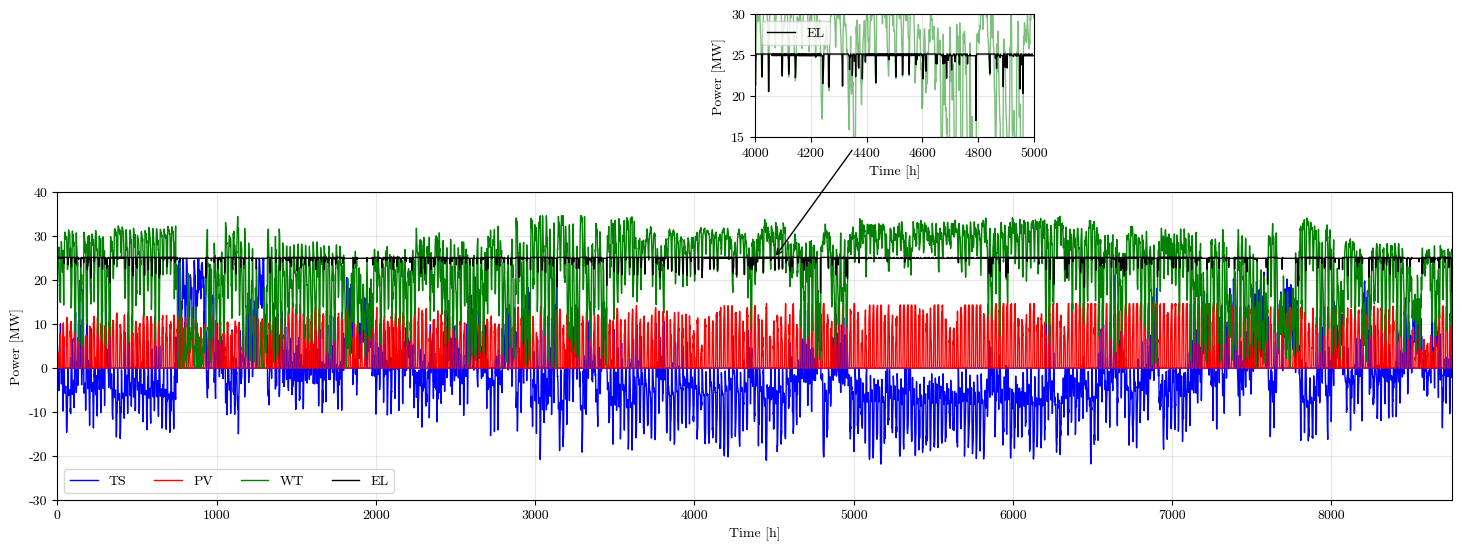

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming df1 is already defined with the necessary columns
PEL_0 = list(df1['PEL_subproblem_main'].values)
Ppurch_0 = list(df1['Ppurch_subproblem_main'].values)
Psell_0 = list(df1['Psell_subproblem_main'].values)
PPV_0 = list(df1[' PPV_subproblem_main'].values)
PWT_0 = list(df1[' PWT_subproblem_main '].values)

# Main plot
fig, ax_main = plt.subplots(figsize=(18, 4))

ax_main.plot(Ppurch_0, linewidth=1, color='b', label=r'TS')
ax_main.plot(-1*np.array(Psell_0), linewidth=1.0, color='b')
ax_main.plot(PPV_0, linewidth=1, color='r', label=r'PV')
ax_main.plot(PWT_0, linewidth=1, color='g', label=r'WT')
ax_main.plot(PEL_0, linewidth=1, color='k', label=r'EL')

ax_main.set_xlabel(r'Time [h]', fontsize=10)
ax_main.set_ylabel(r'Power [MW]', fontsize=10)
ax_main.set_xlim(0, 8760)
ax_main.set_ylim(-30, 40)
ax_main.legend(ncol=5, loc='lower left', fontsize=10)
ax_main.grid(True, alpha=0.3)

# Inset plot with a smaller font size for the axis labels and tick labels
ax_inset = inset_axes(ax_main, width="100%", height="100%", loc='upper center', 
                      bbox_to_anchor=(0.5, 1.2, 0.2, 0.4), bbox_transform=ax_main.transAxes)

ax_inset.plot(PWT_0, linewidth=1, color='g', alpha=0.5)
ax_inset.plot(PEL_0, linewidth=1, color='k', label=r'EL')
ax_inset.set_xlim(4000, 5000)
ax_inset.set_ylim(15, 30)

# Setting smaller font sizes for axis labels
ax_inset.set_xlabel(r'Time [h]', fontsize=10)
ax_inset.set_ylabel(r'Power [MW]', fontsize=10)

# Setting smaller font sizes for tick labels
ax_inset.tick_params(axis='both', which='major', labelsize=10)

ax_inset.legend(ncol=1, loc='upper left', fontsize=10)
ax_inset.grid(True, alpha=0.3)

# Adding an arrow to connect the main plot and the inset plot
ax_main.annotate('', xy=(4500, 25), xytext=(5000, 50),
                 arrowprops=dict(facecolor='red', edgecolor='black', arrowstyle='->', lw=1))

plt.savefig('Balance_P_Scenario_5.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()


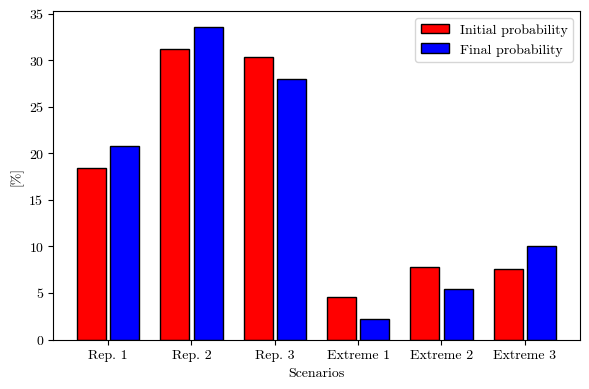

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='serif', serif='cmr10', size=10)
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
initial_probabilities = {
    'Rep. 1': {'Typical': 18.4, 'Extreme': 4.6},
    'Rep. 2': {'Typical': 31.2, 'Extreme': 7.8},
    'Rep. 3': {'Typical': 30.4, 'Extreme': 7.6},
}

final_probabilities = {
    'Extreme 1': {'Typical': 20.7937, 'Extreme': 2.20625},
    'Extreme 2': {'Typical': 33.5937, 'Extreme': 5.40625},
    'Extreme 3': {'Typical': 28.0063, 'Extreme': 9.99375},
}

# Set up the bar chart
bar_width = 0.35
x = np.arange(len(initial_probabilities) * 2)  # the label locations

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plotting initial probabilities with appropriate labels for legend
for i, (cluster, probs) in enumerate(initial_probabilities.items()):
    ax.bar(x[i] - 0.2, probs['Typical'], bar_width, color='red', edgecolor='black', label='Initial probability' if i == 0 else "")
    ax.bar(x[i + 3] - 0.2, probs['Extreme'], bar_width, color='red', edgecolor='black')

# Plotting final probabilities with appropriate labels for legend
for i, (cluster, probs) in enumerate(final_probabilities.items()):
    ax.bar(x[i] + 0.2, probs['Typical'], bar_width, color='blue', edgecolor='black', label='Final probability' if i == 0 else "")
    ax.bar(x[i + 3] + 0.2, probs['Extreme'], bar_width, color='blue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Scenarios',fontsize=10)
ax.set_ylabel('[%]',fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels([f'{cluster}' for cluster in initial_probabilities] + [f'{cluster}' for cluster in final_probabilities],fontsize=10)

# Custom legend with distinct colors and labels
ax.legend(loc='best',fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('Probabilities.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

